In [1]:
# 📦 Data manipulation
import pandas as pd
import numpy as np 

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data_import = pd.read_csv('adults.csv')
data_import

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data preprocessing 

In [4]:
data = data_import.copy()


### Label the columns

In [5]:
# create a new header
header = ["age", "workclass","fnlgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]

# Move old header row (which contains first data row) into dataframe
data.loc[-1] = data.columns.tolist()  # 
data.index = data.index + 1
data = data.sort_index().reset_index(drop=True)

# Assign the proper header names
data.columns = header


In [6]:
data

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Remove unimportant columns

In [7]:
data = data.drop(['education', 'race'],axis=1)


### label encode sex column

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])


In [9]:
#check the mapping
dict(zip(le.classes_, le.transform(le.classes_)))


{' Female': np.int64(0), ' Male': np.int64(1)}

### Drop income and store it in separate variable

In [10]:
data_income = data['income']

In [11]:
data.drop(['income'],axis=1,inplace=True)

### Change native country to Immigrante or Non-Immigrante then apply labl (standard) eincode  

In [12]:
data['native_country'] = data['native_country'].astype(str).str.strip()

data['native_country'] = data['native_country'].apply(
    lambda x: 'Non-Immigrante' if x == 'United-States' else 'Immigrante'
)


In [13]:
data['native_country'].value_counts()


native_country
Non-Immigrante    29170
Immigrante         3391
Name: count, dtype: int64

In [14]:
#data['native_country'] = data['native_country'].map({'Non-Immigrante': 0, 'Immigrante': 1}) # you can use this too insted of label encoder
le2 = LabelEncoder()
data['native_country'] = le2.fit_transform(data['native_country'])


### Numerical data

In [15]:
num_cols = ['age', 'fnlgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week','sex', 'native_country']

In [16]:
data_num = data[num_cols]
data_num 

,age,fnlgt,education_num,capital_gain,capital_loss,hours_per_week,sex,native_country
0,39,77516,13,2174,0,40,1,1
1,50,83311,13,0,0,13,1,1
2,38,215646,9,0,0,40,1,1
3,53,234721,7,0,0,40,1,1
4,28,338409,13,0,0,40,0,0
...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1
32557,40,154374,9,0,0,40,1,1
32558,58,151910,9,0,0,40,0,1
32559,22,201490,9,0,0,20,1,1


### One hot encode 

In [17]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
categorical_cols = ['workclass', 'marital_status', 'occupation', 'relationship',]
data_encoded = pd.DataFrame(ohe.fit_transform(data[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols))     

In [18]:
data_encoded

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital_status_ Married-AF-spouse,marital_status_ Married-civ-spouse,...,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32559,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
data_preprocessed = pd.concat([data_num, data_encoded, data_income], axis=1)
data_preprocessed

,age,fnlgt,education_num,capital_gain,capital_loss,hours_per_week,sex,native_country,workclass_ Federal-gov,workclass_ Local-gov,...,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income
0,39,77516,13,2174,0,40,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,<=50K
1,50,83311,13,0,0,13,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<=50K
2,38,215646,9,0,0,40,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,<=50K
3,53,234721,7,0,0,40,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<=50K
4,28,338409,13,0,0,40,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,<=50K
32557,40,154374,9,0,0,40,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,>50K
32558,58,151910,9,0,0,40,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,<=50K
32559,22,201490,9,0,0,20,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,<=50K


### Save the preprocessed data

In [21]:
import joblib
joblib.dump(data_preprocessed, 'data_preprocessed.pkl') 

['data_preprocessed.pkl']

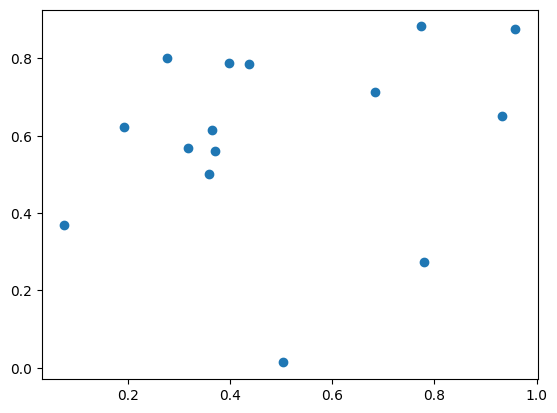

In [20]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import Voronoi

np.random.seed(1234)
points = np.random.rand(15,2)

X = [i[0] for i in points]
Y = [i[1] for i in points]
plt.scatter(X,Y)

